## Task:
1. Data cleaning and EDA
2. Customer segmentation using RFM analysis
3. Customer segmentation using unsupervised ML (K means, DBScans)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
# Data cleaning and EDA
"""
1. Identifying missing values
2. Clean the data
3. Analyze the data by invoice
"""

'\n1. Identifying missing values\n2. Clean the data\n3. Analyze the data by invoice\n'

In [ ]:
df.shape

(541116, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [ ]:
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,NaN


In [ ]:
pd.to_datetime(df['Date of purchase']).min()

Timestamp('2016-12-02 00:00:00')

In [ ]:
pd.to_datetime(df['Date of purchase']).max()

Timestamp('2017-12-19 00:00:00')

In [ ]:
# columns required => customer_id, invoice_no (frequency), date of purchase (recency), price(monetary)
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
cols_required = ['CustomerID', 'InvoieNo', 'Date of purchase', 'Price']
drop_columns = [col for col in df.columns if col not in cols_required]

In [ ]:
drop_columns

['Item Code',
 'Quantity',
 'Time',
 'price per Unit',
 'Shipping Location',
 'Cancelled_status',
 'Reason of return',
 'Sold as set']

In [ ]:
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
df.duplicated().sum()

np.int64(6008)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# missing values
missing_val = df.isnull().sum()
missing_val_perc = df.isnull().sum()/df.shape[0] * 100
missing_val_perc

,0
CustomerID,24.714450
InvoieNo,0.000187
Date of purchase,0.000187
Price,0.000187


In [ ]:
missing_df = pd.concat([missing_val, missing_val_perc], axis = 1, keys = ['missing_num', 'missing_perc'])
missing_df

,missing_num,missing_perc
CustomerID,132249,24.714450
InvoieNo,1,0.000187
Date of purchase,1,0.000187
Price,1,0.000187


In [ ]:
df = df.dropna(subset = ['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [ ]:
import datetime
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [ ]:
df = df.rename(columns = {'InvoieNo':'Invoice_no', 'Date of purchase':'Date'})

In [ ]:
df.head()

,CustomerID,Invoice_no,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   Invoice_no  402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [ ]:
df['Date'].describe()

,Date
count,402859
mean,2017-07-15 14:25:02.538605056
min,2016-12-02 00:00:00
25%,2017-04-12 00:00:00
50%,2017-08-05 00:00:00
75%,2017-10-26 00:00:00
max,2017-12-19 00:00:00


In [ ]:
df

,CustomerID,Invoice_no,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0
...,...,...,...,...
537945,37.0,402292.0,2017-11-28,384.0
537946,37.0,402292.0,2017-11-27,398.0
537947,21.0,363890.0,2016-12-21,2464.0
537948,21.0,363890.0,2016-12-21,4068.0


In [ ]:
df.Price.describe()

,Price
count,402859.000000
mean,2477.465103
std,4896.268647
min,-10152.000000
25%,556.000000
50%,1572.000000
75%,2496.000000
max,90400.000000


In [ ]:
df[df['Price'] < 0]

,CustomerID,Invoice_no,Date,Price
6,4343.0,368432.0,2017-02-13,-3688.0
31,4325.0,366771.0,2017-01-31,-179.0
121,4107.0,364641.0,2016-12-21,-885.0
153,4043.0,387837.0,2017-08-10,-694.0
252,3951.0,384727.0,2017-07-20,-943.0
...,...,...,...,...
537854,3802.0,377012.0,2017-05-06,-382.0
537866,3309.0,372168.0,2017-03-31,-976.0
537867,3309.0,372305.0,2017-03-28,-848.0
537898,1633.0,393042.0,2017-09-24,-788.0


In [ ]:
# use grouby function on df.CustomerID to fetch min and max the customer purchases in the year

In [ ]:
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

## Customer Segmentation using RFM Analysis

Score of 5 => most recent, most frequent, most amount spent and vice versa for score 1
- prime, loyal, potential, at-risk etc

In [ ]:
df.groupby('CustomerID')['Price'].sum()

,Price
CustomerID,
2.0,550416.0
3.0,257404.0
4.0,176613.0
5.0,41976.0
6.0,151822.0
...,...
4368.0,20480.0
4369.0,10774.0
4370.0,24962.0


In [ ]:
RFMApproach = df.groupby('CustomerID').agg({
    'Date': lambda x:(new_date - x.max()).days, #recency
    'Invoice_no': 'count', # frequency
    'Price' : lambda x:x.sum() # monetary
})

RFMApproach.rename(columns = {'Date': "Recency", 'Invoice_no':'Frequency', 'Price':'Monetary'}, inplace=True)

In [ ]:
RFMApproach

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0
...,...,...,...
4368.0,278,10,20480.0
4369.0,181,7,10774.0
4370.0,9,13,24962.0


We will create 4 segments of the above data using the quantile method and assign the score to each customer based on their RFM values

In a class of 1000 students, if i say a score of 100 is 25th percentile, what does that mean?

It means that 25% of students i.e. 25o students have scores less than or equal to 100 marks.

In [ ]:
quantiles = RFMApproach.quantile(q=[0.25, 0.5, 0.75])

In [ ]:
quantiles

,Recency,Frequency,Monetary
0.25,18.0,17.0,38140.0
0.50,51.0,42.0,83635.0
0.75,144.0,101.0,205444.0


In [ ]:
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
RFMApproach

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0
...,...,...,...
4368.0,278,10,20480.0
4369.0,181,7,10774.0
4370.0,9,13,24962.0


In [ ]:
def Recency_value(x, p, d):
  """
  x : the value of col in consideration
  p : the col in consdideration, here is recency
  d : the dictionary quantiles
  """
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
def frequency_monetary_value(x, p, d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

In [ ]:
RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value, args = ('Recency', quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(frequency_monetary_value, args = ('Frequency', quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(frequency_monetary_value, args = ('Monetary', quantiles))

In [ ]:
RFMApproach

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,181,550416.0,4,4,4
3.0,77,27,257404.0,2,2,4
4.0,19,72,176613.0,3,3,3
5.0,311,16,41976.0,1,1,2
6.0,37,84,151822.0,3,3,3
...,...,...,...,...,...,...
4368.0,278,10,20480.0,1,1,1
4369.0,181,7,10774.0,1,1,1
4370.0,9,13,24962.0,4,1,1


In [ ]:
RFMApproach['RFM'] = RFMApproach[['R', 'F', 'M']].sum(axis=1)

In [ ]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,4,4,4,12
1,3.0,77,27,257404.0,2,2,4,8
2,4.0,19,72,176613.0,3,3,3,9
3,5.0,311,16,41976.0,1,1,2,4
4,6.0,37,84,151822.0,3,3,3,9
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,1,1,1,3
4345,4369.0,181,7,10774.0,1,1,1,3
4346,4370.0,9,13,24962.0,4,1,1,6
4347,4371.0,4,751,279720.0,4,4,4,12


In [ ]:
RFMApproach['RFM'].value_counts()

,count
RFM,
5,508
12,471
8,461
6,458
7,447
10,439
3,410
9,405
4,380


In [ ]:
loyalty_level = ['bronze', 'silver', 'gold','platinum']

score_cuts = pd.qcut(RFMApproach.RFM, q = 4, labels = loyalty_level)
RFMApproach['loyalty_level'] = score_cuts.values

In [ ]:
RFMApproach

,Recency,Frequency,Monetary,R,F,M,RFM,loyalty_level
CustomerID,,,,,,,,
2.0,4,181,550416.0,4,4,4,12,platinum
3.0,77,27,257404.0,2,2,4,8,gold
4.0,19,72,176613.0,3,3,3,9,gold
5.0,311,16,41976.0,1,1,2,4,bronze
6.0,37,84,151822.0,3,3,3,9,gold
...,...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,1,1,1,3,bronze
4369.0,181,7,10774.0,1,1,1,3,bronze
4370.0,9,13,24962.0,4,1,1,6,silver


In [ ]:
RFMApproach['loyalty_level'].value_counts()

,count
loyalty_level,
gold,1305
bronze,1298
silver,905
platinum,841


In [ ]:
final_report = RFMApproach.reset_index().groupby('loyalty_level').agg({
    'Recency' : 'sum',
    'Frequency' : 'sum',
    'Monetary' : 'sum',
    'CustomerID' : 'nunique'
}).reset_index()

In [ ]:
final_report.rename(columns = {'CustomerID' : 'No_of_Customers'}, inplace=True)

In [ ]:
final_report

,loyalty_level,Recency,Frequency,Monetary,No_of_Customers
0,bronze,251210,19098,41358221.0,1298
1,silver,80769,30910,68540944.1,905
2,gold,62116,108580,233444984.0,1305
3,platinum,11664,244271,654724965.0,841


In [ ]:
final_report['%customers'] = round(final_report['No_of_Customers'] / final_report['No_of_Customers'].sum() * 100, 2)

In [ ]:
final_report

,loyalty_level,Recency,Frequency,Monetary,No_of_Customers,%customers
0,bronze,251210,19098,41358221.0,1298,29.85
1,silver,80769,30910,68540944.1,905,20.81
2,gold,62116,108580,233444984.0,1305,30.01
3,platinum,11664,244271,654724965.0,841,19.34


In [ ]:
final_report_1 = final_report[['loyalty_level', 'No_of_Customers', '%customers']]
final_report_1

,loyalty_level,No_of_Customers,%customers
0,bronze,1298,29.85
1,silver,905,20.81
2,gold,1305,30.01
3,platinum,841,19.34


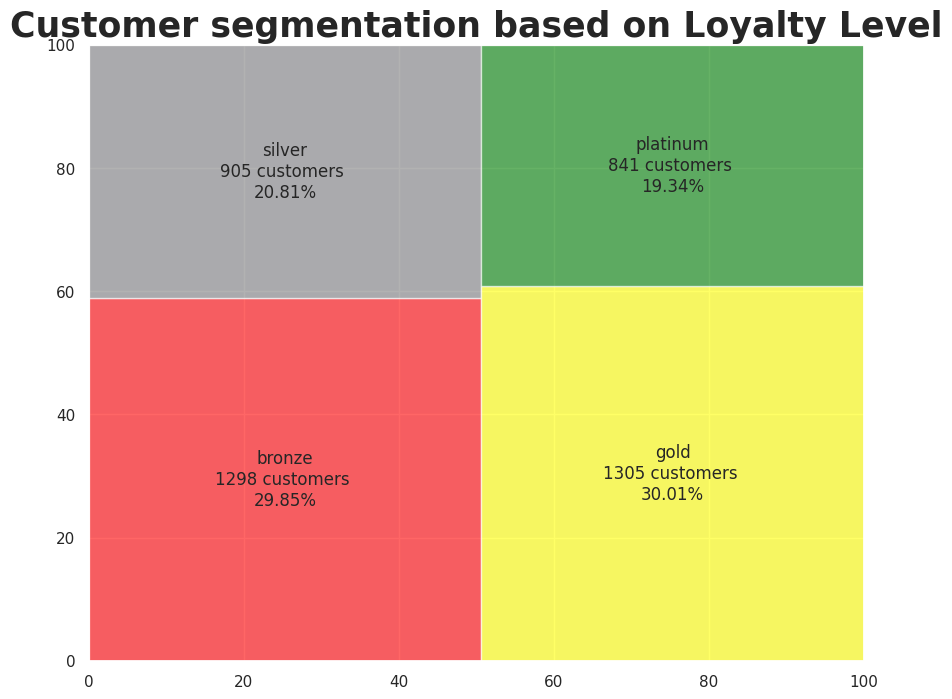

In [ ]:
!pip install squarify
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)

colors_dics = {'bronze' : 'red', 'silver' : 'grey', 'gold' : 'yellow', 'platinum' : 'green'}

squarify.plot(sizes = final_report_1['No_of_Customers'], color = colors_dics.values(), label = ['{}\n{:0.0f} customers \n{}%'.format(*final_report_1.iloc[i]) for i in range(len(final_report_1))], alpha = 0.6)

plt.title('Customer segmentation based on Loyalty Level', fontsize = 25, fontweight = 'bold')
plt.show()

In [ ]:
# hierarchial clustering -> go through

K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
rfm_df = RFMApproach[['Recency', 'Frequency', 'Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


- Cluster of similar points are created based on other points
- Initially centroids are assigned in data and we iterate thru data and get points which are close and form a cluster
- Since this is a distance based algo, data should be standardized to a similar scale

In [ ]:
# Apply standard scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled

array([[-0.88687668,  0.38301434,  0.37509732],
       [-0.16187726, -0.28447368,  0.0326216 ],
       [-0.73790419, -0.08942848, -0.06180783],
       ...,
       [-0.83721918, -0.34515441, -0.23905922],
       [-0.88687668,  2.85358691,  0.05870479],
       [-0.48961672, -0.10676583,  0.0320933 ]])

Find optimal cluster using Elbow method

In [ ]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(rfm_scaled)
  sse.append(kmeans.inertia_)

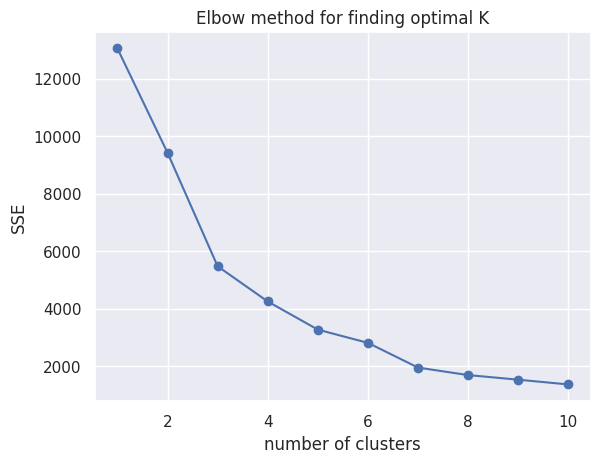

In [ ]:
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Elbow method for finding optimal K')
plt.show()
# best cluster is a cluster value where the graph starts to flatten out
# in the below case it is 5

In [ ]:
 kmeans = KMeans(n_clusters=5, random_state=42)
 rfm_df['cluster_no'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
rfm_df['cluster_no'].value_counts()

,count
cluster_no,
0,2920
1,1063
4,351
3,11
2,4


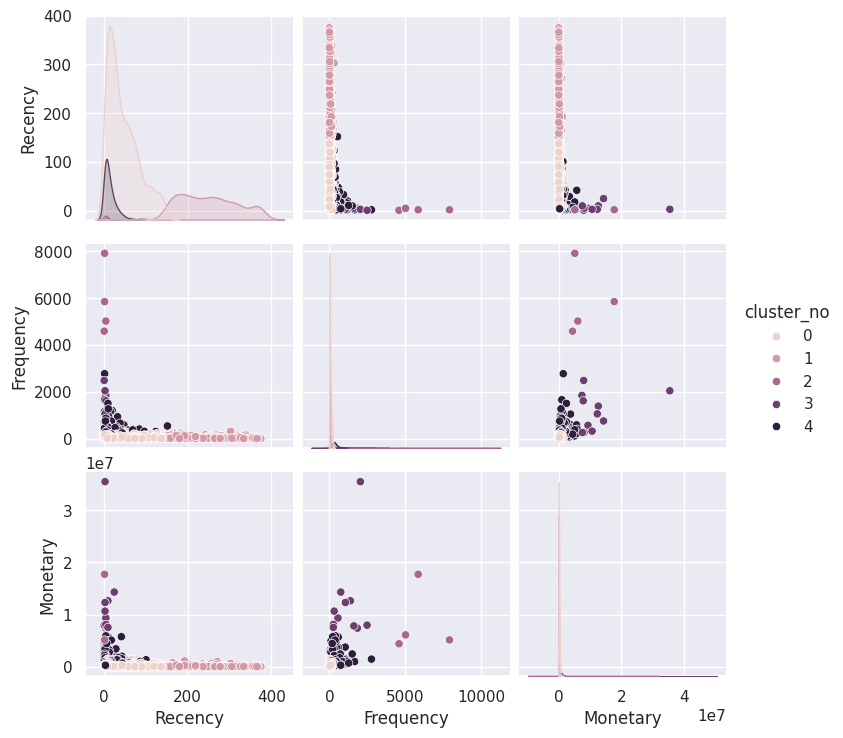

In [ ]:
sns.pairplot(rfm_df, vars = ['Recency', 'Frequency', 'Monetary'], hue = 'cluster_no')
# cant vizualize that well when we use kmeans